Proyek Bangkit Hans
Klasifikasi tingkat kematangan buah pisang menggunakan CNN dan fine tuning

In [5]:
# Extract File

from zipfile import ZipFile

with ZipFile("C:\Data D\Latihan\Teman\Proyek Bangkit_hans\drive-download-20231129T142403Z-001.zip", 'r') as zObject:
    zObject.extractall( 
        path="C:\Data D\Latihan\Teman\Proyek Bangkit_hans\Dataset") 

In [50]:
import os
base_dir = os.path.basename('\Dataset')

In [51]:
kelas = os.listdir(base_dir)
kelas

['Busuk', 'Kurang Matang', 'Matang']

Import Library

In [52]:
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf

EDA

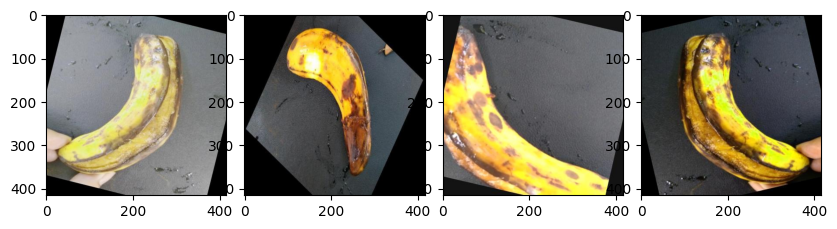

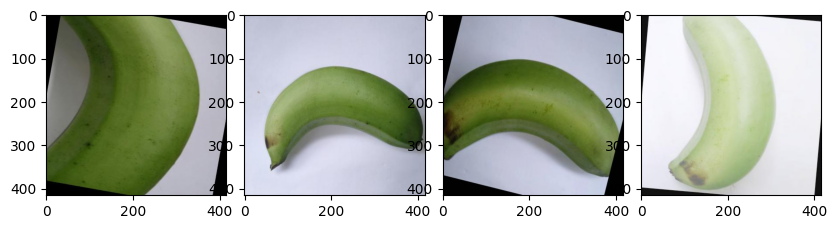

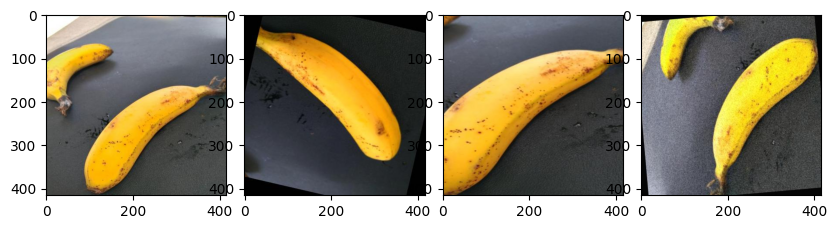

In [59]:
# Menampilkan random sample dari tiap kelas

Image_dir = base_dir
image_file = []
for subdir in os.listdir(Image_dir):
    subdir_path = os.path.join(Image_dir, subdir)
    if os.path.isdir(subdir_path):
        # Get all image files in the subdirectory
        images = [os.path.join(subdir_path, filename) for filename in os.listdir(subdir_path) if filename.endswith((".jpg", ".png", ".jpeg"))]
        # Randomly select 4 image files
        random_images = random.sample(images, 4)
        # Add the selected images to the list of image files
        image_file.extend(random_images)

    # Create a 2x3 grid for displaying the images
    fig, axes = plt.subplots(1, 4, figsize=(10, 8)) #(height, width) & (baris, kolom)
    for i, ax in enumerate(axes.flatten()):
        img = Image.open(random_images[i])
        ax.imshow(img)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

Pre-Processing

In [60]:
img_size = (224, 224) # VGG16 standar
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    validation_split = 0.3
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.3
)

In [61]:
# Generate the training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size= img_size,
    batch_size= 32,
    class_mode='categorical',
    subset='training')

# Generate the validation data
val_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size= img_size,
    batch_size= 32,
    class_mode='categorical',
    subset='validation')

Found 210 images belonging to 3 classes.


Found 90 images belonging to 3 classes.


CNN

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [72]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 186624)            0         
                                                                 
 dense_32 (Dense)            (None, 128)             

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'])

In [74]:
callback = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
checkpoint = keras.callbacks.ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', save_best_only=True)

history = model.fit(
      train_generator,
      epochs=20,
      validation_data=val_generator,
      steps_per_epoch=len(train_generator),
      callbacks = [callback, checkpoint]
      )

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 5.7797 - accuracy: 0.4286 - val_loss: 0.9672 - val_accuracy: 0.4000
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.8755 - accuracy: 0.6333 - val_loss: 0.7484 - val_accuracy: 0.6556
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.7276 - accuracy: 0.6238 - val_loss: 0.6145 - val_accuracy: 0.6556
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.5672 - accuracy: 0.7286 - val_loss: 0.5721 - val_accuracy: 0.6333
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 0.4368 - accuracy: 0.7524 - val_loss: 0.5031 - val_accuracy: 0.6444
Epoch 6/20
7/7 [==============================] - 7s 999ms/step - loss: 0.4360 - accuracy: 0.8048 - val_loss: 0.5036 - val_accuracy: 0.7444
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.3702 - accuracy: 0.8190 - val_loss: 0.3853 - val_accuracy: 0.8000
Epoch 8/20
7/7 [====================

In [75]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print('Test accuracy:', test_acc)

3/3 [==============================] - 1s 168ms/step - loss: 0.1810 - accuracy: 0.9111
Test accuracy: 0.9111111164093018
